## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [1]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

df = pd.read_csv(path)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [2]:
columns = ['engine_displacement',
           'horsepower',
           'vehicle_weight',
           'model_year',
           'fuel_efficiency_mpg'
]

df = df[columns]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

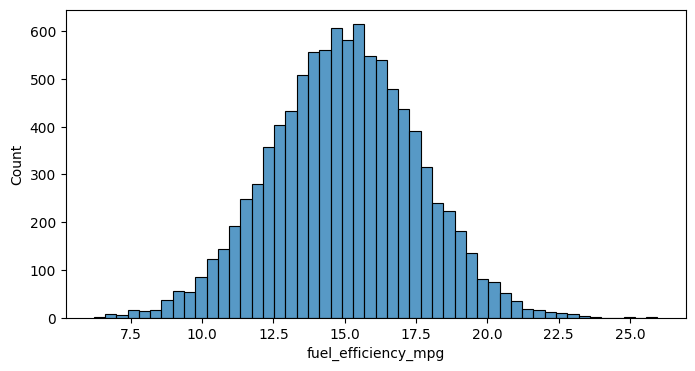

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data = df,
                  x = 'fuel_efficiency_mpg',
                  bins=50)

plt.show()

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [4]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [5]:
df['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures




In [13]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_test - n_val

n, n_val , n_test , n_train, n_val + n_test + n_train

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test =  df.iloc[idx[n_val+n_train:]]

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']



In [14]:
df.shape[0] == (df_train.shape[0] + df_test.shape[0] + df_val.shape[0])

True

In [15]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [18]:
df_train.shape, y_train.shape

((5824, 4), (5824,))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [23]:
def prepare_X(df,fill):
    df_num = df.copy()
    df_num = df_num.fillna(fill)
    X = df_num.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y,y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

fillna = [df_train.horsepower.mean(), 0]

for f in fillna:
    #Training data
    X_train = prepare_X(df_train, f)
    w0, w = train_linear_regression(X_train,y_train)

    #Validating data
    X_val = prepare_X(df_val, f)
    y_pred = w0 + X_val.dot(w)

    var_rmse = round(rmse(y_val,y_pred),2)

    print(f'Fillna: {f} - RMSE: {var_rmse}')




Fillna: 149.54476367006487 - RMSE: 0.46
Fillna: 0 - RMSE: 0.52


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100




In [28]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def train_linear_regression_reg(X, y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

reg_list = [0, 0.01, 0.1, 1, 5, 10, 100]

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in reg_list:
    w0, w = train_linear_regression_reg(X_train,y_train,r = r)
    #Validating data
    y_pred = w0 + X_val.dot(w)
    var_rmse = round(rmse(y_val,y_pred),2)

    print(f"r:{r} --> RMSE {var_rmse}")

r:0 --> RMSE 0.52
r:0.01 --> RMSE 0.52
r:0.1 --> RMSE 0.52
r:1 --> RMSE 0.52
r:5 --> RMSE 0.52
r:10 --> RMSE 0.52
r:100 --> RMSE 0.52


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.




In [38]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def train_linear_regression_reg(X, y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_test - n_val

n, n_val , n_test , n_train, n_val + n_test + n_train
idx = np.arange(n)
seeds =  np.arange(0,10,1)
scores = []
for s in seeds:
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_val+n_train]]
    df_test =  df.iloc[idx[n_val+n_train:]]

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    #Training data
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train,y_train)

    #Validation data
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'Seed: {s}, Score: {score}')
    scores.append(score)


print(f"{round(np.mean(scores),2)} {round(np.std(scores),3)}"  )

Seed: 0, Score: 0.5206531296297207
Seed: 1, Score: 0.5228485491207858
Seed: 2, Score: 0.5168340162027822
Seed: 3, Score: 0.5256717600298536
Seed: 4, Score: 0.5213713709795013
Seed: 5, Score: 0.5251461732321003
Seed: 6, Score: 0.5255505441230452
Seed: 7, Score: 0.506843091606115
Seed: 8, Score: 0.5200613086973845
Seed: 9, Score: 0.5140844796254321
0.52 0.006


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5



In [43]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_test - n_val

n, n_val , n_test , n_train, n_val + n_test + n_train

idx = np.arange(n)
seeds =  np.arange(0,10,1)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test =  df.iloc[idx[n_val+n_train:]]

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.reset_index(drop = True)

y_full_train = np.concatenate([y_train, y_val])

#Training data
X_full_train = prepare_X(df_full_train)

w0, w = train_linear_regression_reg(X_full_train,y_full_train,r=0.001)

#Validating data
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test,y_pred),3)
print(score)

0.516


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one